In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
import pickle

X = pickle.load(open('train.p'))
y = pickle.load(open('correct.p'))

longNames = ["Flick Left:1",
    "Flick Right:2",
    "Flick Up:3",
    "Flick Down:4",
    "Pan Left:5",
    "Pan Right:6",
    "Pan Up:7",
    "Pan Down:8",
    "Push:9",
    "Pull:10",
    "Double Tap:11",
    "Finger Wave Out:12",
    "Finger Wave In:13",
    "Whip:14",
    "Pluck:15",
    "Put:16",
    "Click:17",
    "Double Click:18",
    "Wobble:19",
    "Circle:20",
    "Erase:21"]

longNamesYY = ["FL:1",
    "FR:2",
    "FU:3",
    "FD:4",
    "PL:5",
    "PR:6",
    "PU:7",
    "PD:8",
    "Psh:9",
    "Pll:10",
    "DT:11",
    "FWO:12",
    "FWI:13",
    "Whp:14",
    "PCK:15",
    "Put:16",
    "Ck:17",
    "DCk:18",
    "Wob:19",
    "Cir:20",
    "Era:21"]

print(len(X))
print(len(X[0]))
print(X[0])

1680
84
[ -2.79374902e+02  -2.77969072e+02  -2.77701260e+02  -2.78059492e+02
  -2.77248092e+02  -2.77323856e+02  -2.78120069e+02  -2.77954655e+02
  -2.78831490e+02  -2.78895977e+02  -2.76458722e+02  -2.72277587e+02
  -2.63387939e+02  -2.44209881e+02  -1.94709802e+02  -4.18657313e+01
   5.70079393e+02   6.85679232e+03   2.45161864e+03  -5.46284049e+02
  -3.91264769e+02  -4.40628427e+02  -1.37171948e+02  -1.61443452e+02
  -2.27658149e+02  -2.49516554e+02  -2.51984359e+02  -2.52494050e+02
  -2.47113676e+02  -2.46986927e+02  -2.22599589e+02  -1.10365263e+02
   5.49145977e+02  -1.38506429e+02  -2.38970737e+02  -2.57713601e+02
  -2.58591693e+02  -2.54049288e+02  -2.22502835e+02  -6.40918106e+02
  -2.37051914e+02  -2.36036978e+02  -2.35819853e+02  -2.35679468e+02
  -2.35864463e+02  -2.35882835e+02  -2.34846047e+02  -2.35862235e+02
  -2.37131512e+02  -2.36292841e+02  -2.34313077e+02  -2.31549239e+02
  -2.25352425e+02  -2.10116346e+02  -1.67836187e+02  -3.79342793e+01
   4.41015486e+02   5.8723

In [2]:
import scipy.signal as sp
from sklearn.preprocessing import StandardScaler



def get_maxima(row):
    lenfeat = 60
    backstart = 20
    idx = np.argmax(row[:lenfeat])
    strt = max([idx-backstart, 0])
    end = strt+lenfeat
    
    return (strt,end)

Xnew = []
# get maxima in the 
for i in range(X.shape[0]):
    mfiltsize = 5
    strt,end = get_maxima(X[i,0:99])
    strt, end = 0, 99
    feat1 = sp.medfilt( X[i,strt:end], mfiltsize)
    feat2 = sp.medfilt( X[i,strt+100:end+100], mfiltsize)
    feat3 = X[i, 200:]
    newrow = np.concatenate((feat1,feat2,feat3))
    Xnew.append(newrow)
    
    
scl = StandardScaler()
Xnew = scl.fit_transform(Xnew)
Xnew = np.array(Xnew)
    

In [3]:
#Map between users and their test ids
userMap = np.array([
    [36, 37, 43, 47, 52, 56, 60, 64, 91, 92],
    [38, 39, 42, 46, 51, 55, 59, 63, 67, 70],
    [40, 45, 49, 54, 58, 62, 66, 69, 73, 75],
    [41, 44, 48, 53, 57, 61, 65, 68, 71, 74],
    [72, 76, 77, 78, 79, 80, 81, 82, 83, 84],
    [85, 86, 87, 88, 89, 90, 94, 95, 96, 97],
    [93, 100, 102, 110, 111, 112, 113, 114, 115, 116],
    [98, 99, 101, 103, 104, 105, 106, 107, 108, 109] ])

testToUser = np.zeros(80)
for i in range(8):
    for j in range(10):
        if userMap[i][j] > 50:
            testToUser[userMap[i][j] - 37] = i
        else:
            testToUser[userMap[i][j] - 36] = i

print testToUser
testToUser = np.tile(testToUser, 21)
print len(testToUser)

[ 0.  0.  1.  1.  2.  3.  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.
  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.  1.  3.  2.  1.  3.  4.
  2.  3.  2.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.
  0.  0.  6.  5.  5.  5.  5.  7.  7.  6.  7.  6.  7.  7.  7.  7.  7.  7.
  7.  6.  6.  6.  6.  6.  6.  6.]
1680


In [4]:
# reduced gesture set
longNamesC = ["Left:1",
    "Right:2",
    "Up:3",
    "Down:4",
    "Push:5",
    "Pull:6",
    "Double:7",
    "Single:9",
#    "Finger:10",
#    "Double Click:11",
#    "Wobble:12",
#    "Circle:13",
    "Erase:14"]

longNamesYYC = ["LEF:1",
    "RIT:2",
    "UP:3",
    "DWN:4",
    "PSH:5",
    "PUL:6",
    "DTP:7",
    "WHP:9",
#    "FIN:10",
#    "DCL:11",
#    "WOB:12",
#    "CRC:13",
    "ERS:14"]

#remapping
#y = pickle.load(open('correct_80.p'))
ycombined = np.copy(y)
ycombined[y == 4] = 0.0 #l/r/u/d combined
ycombined[y == 5] = 1.0
ycombined[y == 6] = 2.0
ycombined[y == 7] = 3.0
ycombined[y == 8] = 4.0 #push
ycombined[y == 9] = 5.0 #pull
ycombined[y == 10] = 6.0 #dtap
ycombined[y == 11] = 7.0 #wave out
ycombined[y == 12] = 7.0 #wave in
ycombined[y == 13] = 8.0 #whip
ycombined[y == 14] = 5.0 #pluck
ycombined[y == 15] = 4.0 #put
ycombined[y == 16] = 8.0 #click
ycombined[y == 17] = 6.0 #dclick
ycombined[y == 18] = 7.0 #wobble
ycombined[y == 19] = 7.0 #circle
ycombined[y == 20] = 9.0 #erase

toRemove = ycombined != 7
ycombined = ycombined[toRemove]
Xcomb = X[toRemove]
tTUC = testToUser[toRemove]

for i in np.unique(ycombined):
    print len(ycombined[ycombined == i])

160
160
160
160
160
160
160
160
80


In [13]:
import sys
from dtw import dtw

%load_ext rpy2.ipython

import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

# Set up our R namespaces
R = rpy2.robjects.r
DTW = importr('dtw')

def metric_distance(a, b):
    
    if len(a) != 84:
        return 0
    
    #mlpy.dtw
#     low_dist, cost, path = dtw(a[0:40], b[0:40])
#     hi_dist, cost, path = dtw(a[40:80], b[40:80])
#     dir_dist = 5 * (abs(a[80] - b[80]) + abs(a[81] - b[81]) + abs(a[82] - b[82]) + abs(a[83] - b[83]))
    
    #r's dtw
    alignment = R.dtw(a[0:40], b[0:40], keep=True)
    low_dist = alignment.rx('distance')[0][0]
    alignment = R.dtw(a[40:80], b[40:80], keep=True)
    hi_dist = alignment.rx('distance')[0][0]
    
    dir_dist = 100 * (abs(a[80] - b[80]) + abs(a[81] - b[81]) + abs(a[82] - b[82]) + abs(a[83] - b[83]))
    
    return (low_dist + hi_dist) + dir_dist

testnum = 800
for i in range(0, len(Xcomb), 20):
    print("dist(%d (%d), %d (%d)) = %.2f" % (testnum, ycombined[testnum], i, ycombined[i], metric_distance(Xcomb[testnum], Xcomb[i])))

# counts = np.zeros((10, 10))
# totals = np.zeros((10, 10))

# for i in range(0, len(Xcomb)):
    
#     print("%d/%d" % (i, len(Xcomb)))
        
#     for j in range(i + 1, len(Xcomb)):
#         counts[ycombined[i]][ycombined[j]] += 1
#         counts[ycombined[j]][ycombined[i]] += 1
#         dist = metric_distance(Xcomb[i], Xcomb[j])
#         totals[ycombined[i]][ycombined[j]] += dist
#         totals[ycombined[j]][ycombined[i]] += dist

# print("This is type %d" % (ycombined[testnum]))
# for i in range(0, 10):
#     if i == 7:
#         continue
#     print("Type %d = %.2f" % (i, totals[i] / counts[i]))

# print(totals / counts)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
dist(800 (6), 0 (0)) = 39958.22
dist(800 (6), 20 (0)) = 303.70
dist(800 (6), 40 (0)) = 3105.20
dist(800 (6), 60 (0)) = 285.36
dist(800 (6), 80 (1)) = 300.64
dist(800 (6), 100 (1)) = 302.72
dist(800 (6), 120 (1)) = 6119.07
dist(800 (6), 140 (1)) = 298.95
dist(800 (6), 160 (2)) = 343.01
dist(800 (6), 180 (2)) = 199.82
dist(800 (6), 200 (2)) = 974.35
dist(800 (6), 220 (2)) = 285.22
dist(800 (6), 240 (3)) = 2934.40
dist(800 (6), 260 (3)) = 301.13
dist(800 (6), 280 (3)) = 3071.29
dist(800 (6), 300 (3)) = 284.51
dist(800 (6), 320 (0)) = 3100.00
dist(800 (6), 340 (0)) = 298.61
dist(800 (6), 360 (0)) = 285.40
dist(800 (6), 380 (0)) = 276.52
dist(800 (6), 400 (1)) = 392.65
dist(800 (6), 420 (1)) = 298.20
dist(800 (6), 440 (1)) = 471.40
dist(800 (6), 460 (1)) = 294.11
dist(800 (6), 480 (2)) = 853.42
dist(800 (6), 500 (2)) = 297.41
dist(800 (6), 520 (2)) = 879.66
dist(800 (6), 540 (2)) = 292.07
dist(800 (6

In [ ]:

# clf = SVC()

# params = {'kernel':['linear'], 'C':np.logspace(-3, 10, 5)}
# grdobj = GridSearchCV(clf,params,n_jobs=-1)

# grdobj.fit(Xnew,ycombined)

# print grdobj.best_estimator_

In [9]:
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# pca_obj = PCA(n_components=50)

# clf_best = RandomForestClassifier(n_estimators=100, n_jobs = -1)
clf_best = KNeighborsClassifier(n_neighbors=7, metric='pyfunc', func=metric_distance)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

cv = StratifiedKFold(y, n_folds=10)
yhat = np.zeros(y.shape)

for train, test in cv:
    clf_best.fit(Xnew[train],y[train])
    yhat[test] = clf_best.predict(Xnew[test])
    
conf = confusion_matrix(y,yhat)
print accuracy_score(y, yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYYC)))
ax.set_yticks(range(len(longNamesC)))
ax.set_xticklabels(longNamesYYC)
ax.set_yticklabels(longNamesC)
fig.colorbar(cax)
plt.show()

/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error: Interrupted

  res = super(Function, self).__call__(*new_args, **new_kwargs)


KeyboardInterrupt: 

0.359523809524


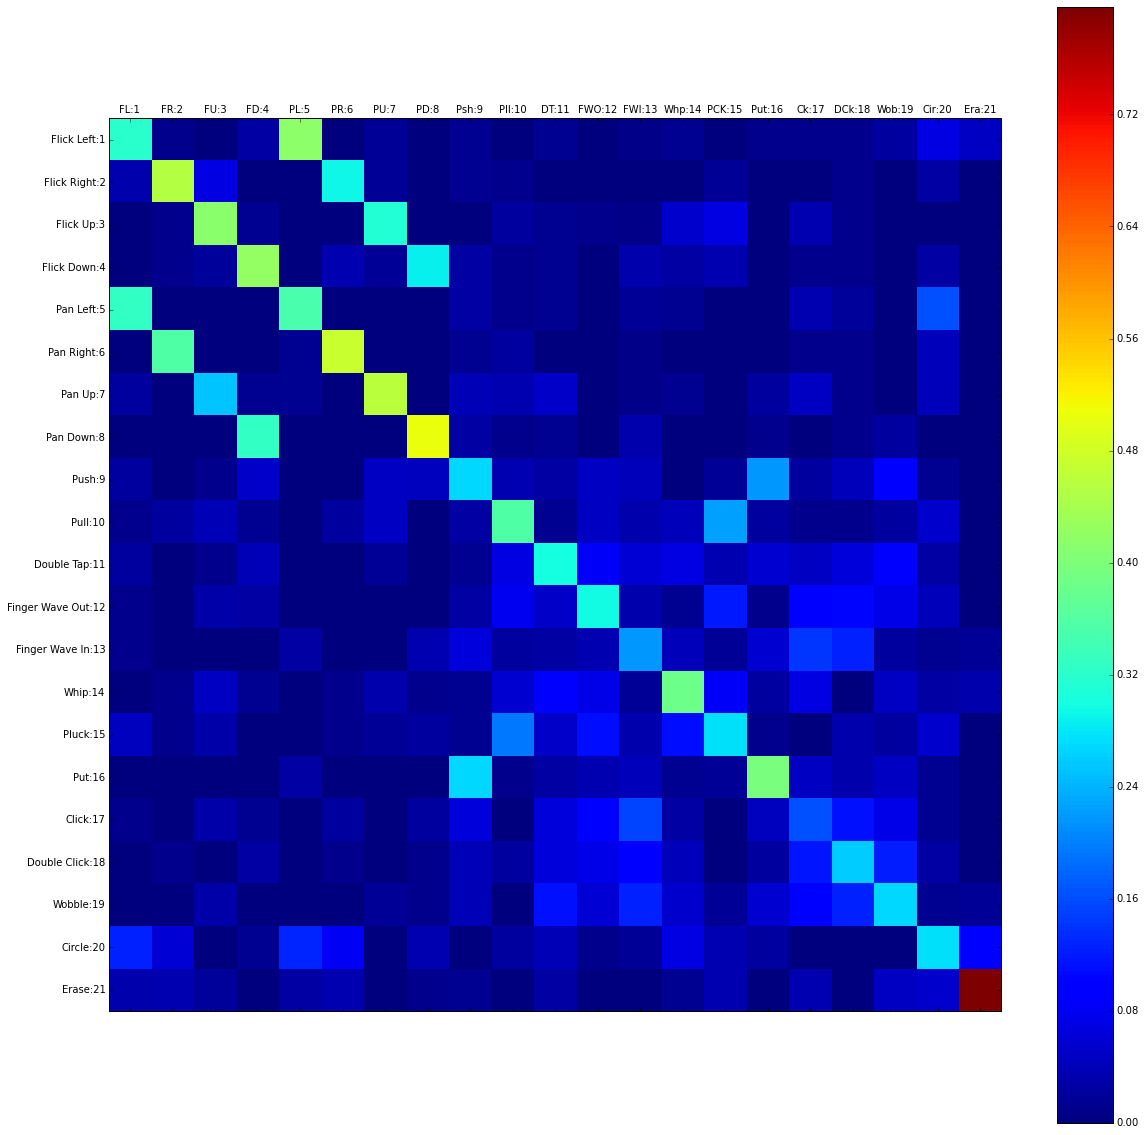

In [5]:
# confusion matrix normalized

conf = confusion_matrix(y,yhat)
print accuracy_score(y,yhat)

conf_normalized = conf.astype(np.float)
for i in range(conf.shape[0]):
    conf_normalized[:,i] = conf_normalized[:,i] / np.sum(conf[:,i] )


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_normalized)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

Testing user 0
Testing user 1
Testing user 2
Testing user 3
Testing user 4
Testing user 5
Testing user 6
Testing user 7
0.619852941176


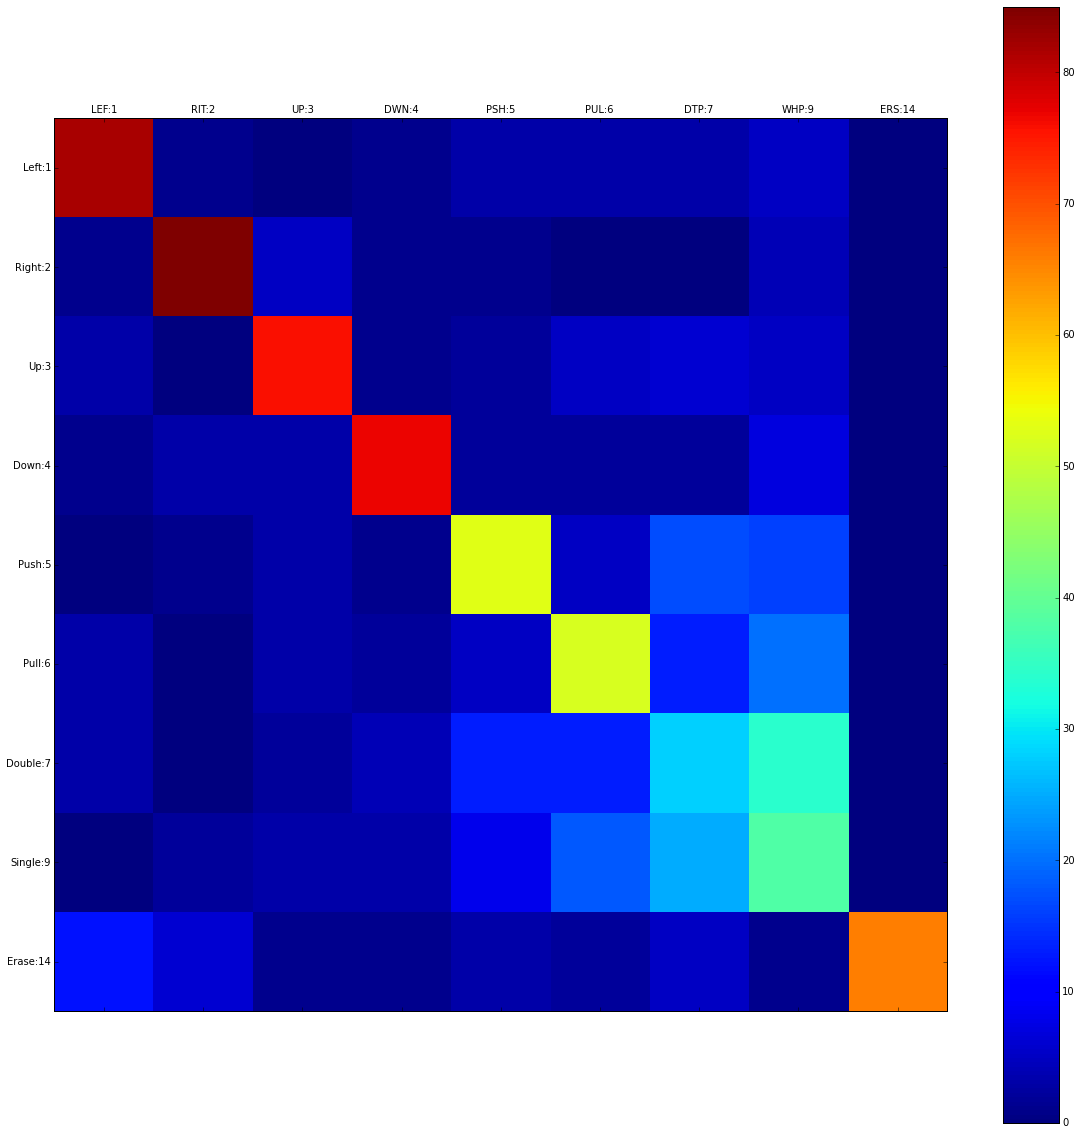

In [15]:
# across user 

from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from s toileklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# pca_obj = PCA(n_components=50)

# clf_best = RandomForestClassifier(n_estimators=100, n_jobs = -1)
clf_best = KNeighborsClassifier(n_neighbors=7, metric='pyfunc', func=metric_distance)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(ycombined.shape)

user = np.arange(8) # 8 users
for u in user:
    print("Testing user %d" % (u))
    test = np.where(tTUC==u)
    train = np.where(tTUC!=u)
    clf_best.fit(Xcomb[train],ycombined[train])
    yhat[test] = clf_best.predict(Xcomb[test])
    
conf = confusion_matrix(ycombined,yhat)
print accuracy_score(ycombined,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYYC)))
ax.set_yticks(range(len(longNamesC)))
ax.set_xticklabels(longNamesYYC)
ax.set_yticklabels(longNamesC)
fig.colorbar(cax)
plt.show()

0.270238095238


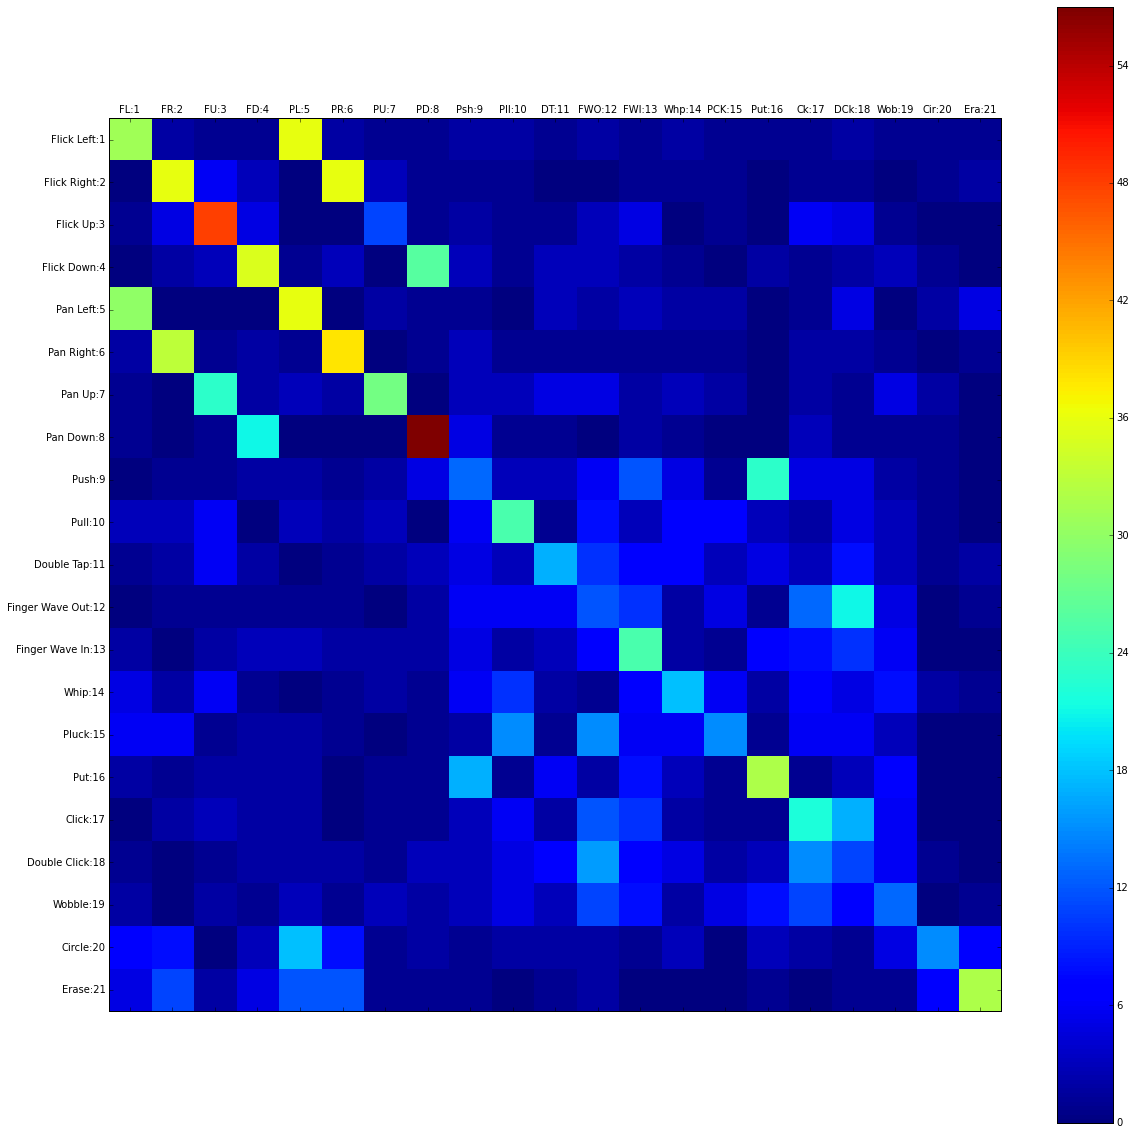

In [10]:
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# per user calibration
clf_best = RandomForestClassifier(n_estimators=50, n_jobs = -1)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(y.shape)

user = np.arange(8)
for u in user:
    user_indices = np.where(testToUser==u)
    Xuser = X[user_indices]
    yuser = y[user_indices]
    cv = StratifiedKFold(y[user_indices], n_folds=10)
    yhat_user = np.zeros(yuser.shape)
    for trainf, test in cv:
        clf_best.fit(Xuser[trainf],yuser[trainf])
        yhat_user[test] = clf_best.predict(Xuser[test])
    yhat[user_indices] = yhat_user
    
    
conf = confusion_matrix(y,yhat)
print accuracy_score(y,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

	0	1	2	3	4	5	6	7	8	9
0:	880.29	779.60	962.97	1102.64	711.84	879.99	892.71	nan	698.49	715.30	(min = 698.49)
1:	779.60	376.28	708.04	850.40	463.63	636.70	644.94	nan	446.12	469.53	(min = 376.28)
2:	962.97	708.04	784.38	1032.49	645.41	816.47	827.69	nan	631.04	780.77	(min = 631.04)
3:	1102.64	850.40	1032.49	1043.04	782.10	956.59	962.83	nan	767.78	912.33	(min = 767.78)
4:	711.84	463.63	645.41	782.10	390.55	565.72	572.93	nan	377.10	536.61	(min = 377.10)
5:	879.99	636.70	816.47	956.59	565.72	737.81	745.70	nan	550.47	707.58	(min = 550.47)
6:	892.71	644.94	827.69	962.83	572.93	745.70	755.59	nan	558.77	717.66	(min = 558.77)
7:	nan	nan	nan	nan	nan	nan	nan	nan	nan	nan	(min = nan)
8:	698.49	446.12	631.04	767.78	377.10	550.47	558.77	nan	363.39	520.73	(min = 363.39)
9:	715.30	469.53	780.77	912.33	536.61	707.58	717.66	nan	520.73	436.58	(min = 436.58)


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


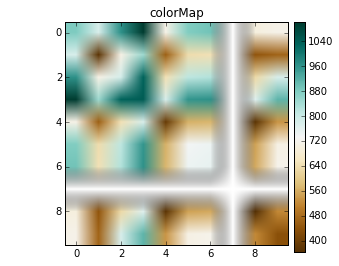

In [101]:
print_mat = totals / counts
#for x in range(0,10):
#    print_mat[x] = print_mat[x] / np.nanmax(print_mat[x])

print("\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9")
for x in range(0,10):
    print("%d:\t" % (x)),
    
    for y in range(0, 10):
        print("%.2f\t" % (print_mat[x][y])),
        
    print("(min = %.2f)" % (np.nanmin(print_mat[x])))
    
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(print_mat, cmap='BrBG')
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()